<a href="https://colab.research.google.com/github/JackGallagher41/IDS/blob/main/project4/problem2_python_ipynp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Jack Gallagher**

### **Problem 2 Python**

November 3, 2023

## **1. Use the following nutrition dataset: https://github.com/bforoura/IDS/blob/main/HW4/nutrition_subset.csv Links to an external site.**

In [1]:
import pandas as pd

#used to import the database
nutritionSubsetDF  = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv")

#print the dataframe
nutritionSubsetDF

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


## **2.Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.**

In [2]:
#Sort the dataframe by saturated fat and print the top 5 headers
nutritionSubsetDF.sort_values(by = 'saturated_fat', ascending = False, inplace = True)
nutritionSubsetDF.head(5)

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


When looking at food sizes it is very important to weigh in portion size with nutrition facts. Comparing a tea spoon of something to a whole pie is unreasonable due to the fact you would most likely have multiple tea spoons of the one and would not have a whole pie. Companies often use portion sizes to combat this.

## **3. Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat  by the weight in grams. Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food  items highest in saturated fat per gram. Which food has the most saturated fat per gram?**

In [14]:
#First I set a new column, saturated fat per gram, equal to saturated fat divided by weight in grams
#I then sort by that new column and call the top 5 values
nutritionSubsetDF['saturated_fat_per_gram']=nutritionSubsetDF['saturated_fat']/nutritionSubsetDF['weight_in_grams']

nutritionSubsetDF.sort_values(by = 'saturated_fat_per_gram', ascending = False, inplace = True)
nutritionSubsetDF.head(5)


,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,scaled_satured_fat_per_gram,scaled_weight_in_grams,scaled_cholesterol,scaled_satured_fat
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143,7.110475,-0.770169,-0.012958,0.289827
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143,7.110475,-0.770169,-0.012958,0.289827
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310,7.082741,-0.207086,1.788571,4.945855
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310,7.082741,-0.207086,1.788571,4.945855
912,BUTTER; SALTED 1 PAT,5.0,2.5,11,0.500000,7.002408,-0.821358,-0.179766,-0.138528


## **4. Standardize (zero mean) the field saturated_ fat_ per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_ fat_ per_gram**

In [17]:
from scipy import stats
#First we scale the saturated fat per gram column then do three
nutritionSubsetDF['scaled_satured_fat_per_gram'] = stats.zscore(nutritionSubsetDF.saturated_fat_per_gram, nan_policy='omit')

#create the low end of the three sigma rule and the high end by splitting the rule into 2
scaled_saturated_fat_per_gram_high = nutritionSubsetDF.query('scaled_satured_fat_per_gram > 3')['scaled_satured_fat_per_gram']
scaled_saturated_fat_per_gram_low = nutritionSubsetDF.query('scaled_satured_fat_per_gram < -3')['scaled_satured_fat_per_gram']

#Find the count of each outlier
print('High Outliers: ', len(scaled_saturated_fat_per_gram_high))
print('Low Outliers: ', len(scaled_saturated_fat_per_gram_low))


High Outliers:  15
Low Outliers:  0


<Axes: ylabel='Density'>

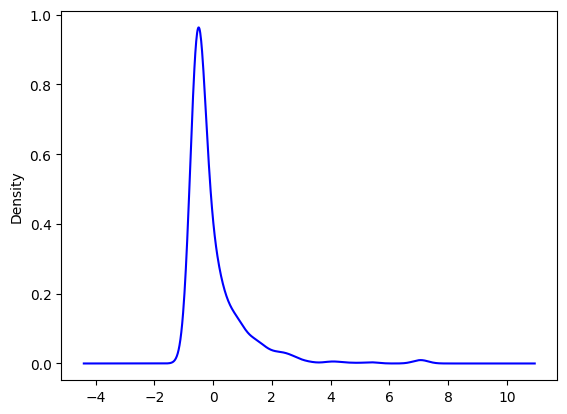

In [20]:
#plot saturated fat per gram on a density plot
import matplotlib.pyplot as plt
nutritionSubsetDF.scaled_satured_fat_per_gram.plot.density(color="blue")

## **5. Are there any missing values? If so, impute as necessary and explain your approach.**

In [5]:
#check for any missing values
nutritionSubsetDF.isna().any()

food item                      False
weight_in_grams                False
saturated_fat                  False
cholesterol                    False
saturated_fat_per_gram         False
scaled_satured_fat_per_gram    False
dtype: bool

No values are needed to be imputed

## **6. Standardize (zero mean) the numeric variables, and determine if there are any outliers.**

In [6]:
#First we scale the weight in grams column then do three
nutritionSubsetDF['scaled_weight_in_grams'] = stats.zscore(nutritionSubsetDF.weight_in_grams, nan_policy='omit')

#create the low end of the three sigma rule and the high end by splitting the rule into 2
scaled_weight_in_grams_high = nutritionSubsetDF.query('scaled_weight_in_grams > 3')['scaled_weight_in_grams']
scaled_weight_in_grams_low = nutritionSubsetDF.query('scaled_weight_in_grams < -3')['scaled_weight_in_grams']

#Find the count of each outlier
print('High Outliers: ', len(scaled_weight_in_grams_high))
print('Low Outliers: ', len(scaled_weight_in_grams_low))

High Outliers:  22
Low Outliers:  0


In [7]:
#First we scale the cholesterol column then do three
nutritionSubsetDF['scaled_cholesterol'] = stats.zscore(nutritionSubsetDF.cholesterol, nan_policy='omit')

#create the low end of the three sigma rule and the high end by splitting the rule into 2
scaled_cholesterol_high = nutritionSubsetDF.query('scaled_cholesterol > 3')['scaled_cholesterol']
scaled_cholesterol_low = nutritionSubsetDF.query('scaled_cholesterol< -3')['scaled_cholesterol']

#Find the count of each outlier
print('High Outliers: ', len(scaled_cholesterol_high))
print('Low Outliers: ', len(scaled_cholesterol_low))

High Outliers:  17
Low Outliers:  0


In [8]:
#First we scale the saturated fat column then do three
nutritionSubsetDF['scaled_satured_fat'] = stats.zscore(nutritionSubsetDF.saturated_fat, nan_policy='omit')

#create the low end of the three sigma rule and the high end by splitting the rule into 2
scaled_saturated_fat_high = nutritionSubsetDF.query('scaled_satured_fat > 3')['scaled_satured_fat']
scaled_saturated_fat_low = nutritionSubsetDF.query('scaled_satured_fat< -3')['scaled_satured_fat']

#Find the count of each outlier
print('High Outliers: ', len(scaled_saturated_fat_high))
print('Low Outliers: ', len(scaled_saturated_fat_low))

High Outliers:  20
Low Outliers:  0


## **7. Summarize**



*   Utilizing sort by we are able to determine the highs and the lows of certain column values
*   When looking at the data set it is good to consider the portions of food when weighing the health factors
* When using grams to divide the saturated fat the data had less outliers
* The data set only have high outliers in every category
* The data had no data that needed to be imputed
* The different usages of food whether it be weight, usage or amount are all things you need to think about when looking at this data set
